In [13]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from history_plot import plot_accuracy, plot_loss
from matplotlib import pyplot as plt

In [2]:
BASE_DIR = os.getcwd()
LARGE_DATASET_DIR = os.path.join(BASE_DIR, 'large_dataset')
TRAIN_DIR = os.path.join(LARGE_DATASET_DIR, 'train')
TEST_DIR = os.path.join(LARGE_DATASET_DIR, 'test')

In [3]:
train_batch = ImageDataGenerator(rescale=1/255, validation_split=0.2).flow_from_directory(
    TRAIN_DIR, 
    color_mode='grayscale', 
    batch_size=32,
    target_size=(256, 256),
    subset='training'
)

Found 5922 images belonging to 2 classes.


In [4]:
validation_batch = ImageDataGenerator(rescale=1/255, validation_split=0.2).flow_from_directory(
    TRAIN_DIR, 
    color_mode='grayscale', 
    batch_size=32,
    target_size=(256, 256),
    subset='validation'
)

Found 1480 images belonging to 2 classes.


In [5]:
test_batch = ImageDataGenerator(rescale=1/255).flow_from_directory(
    TEST_DIR, 
    color_mode='grayscale', 
    batch_size=32,
    target_size=(256, 256),
)

Found 602 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(train_batch, validation_data=validation_batch, batch_size=32, epochs=15)

Epoch 1/15
186/186 [==============================] - 209s 1s/step - loss: 0.2325 - accuracy: 0.9132 - val_loss: 0.0616 - val_accuracy: 0.9865
Epoch 2/15
186/186 [==============================] - 32s 173ms/step - loss: 0.0142 - accuracy: 0.9970 - val_loss: 0.0209 - val_accuracy: 0.9926
Epoch 3/15
186/186 [==============================] - 34s 181ms/step - loss: 0.0126 - accuracy: 0.9953 - val_loss: 0.0091 - val_accuracy: 0.9953
Epoch 4/15
186/186 [==============================] - 34s 181ms/step - loss: 1.5470e-04 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 0.9892
Epoch 5/15
186/186 [==============================] - 34s 182ms/step - loss: 6.3683e-05 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 0.9926
Epoch 6/15
186/186 [==============================] - 34s 185ms/step - loss: 3.8740e-05 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 0.9939
Epoch 7/15
186/186 [==============================] - 34s 183ms/step - loss: 2.6401e-05 - accuracy: 1.0000 - val_loss: 0

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                2097184   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 2,112,034
Trainable params: 2,112,034
Non-trainable params: 0
______________________________________________

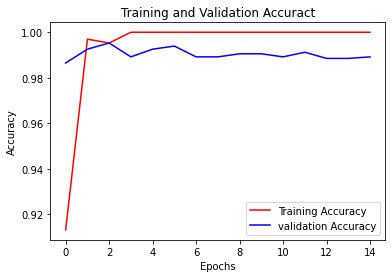

In [14]:
plot_accuracy(history)

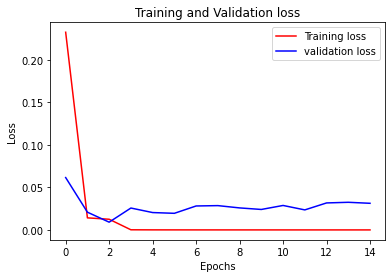

In [15]:
plot_loss(history)

In [16]:
predicted = model.evaluate(test_batch)

19/19 [==============================] - 11s 597ms/step - loss: 0.0864 - accuracy: 0.9950


In [17]:
predicted

[0.08642752468585968, 0.9950166344642639]

In [18]:
model.save('001.h5')